# CIBMTR - Equity in post-HCT Survival Predictions

# <center><img src="https://www.kaggle.com/competitions/70942/images/header"></center>

1. # Importing Python Libraries 📕 📗 📘 📙

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from xgboost import XGBClassifier




import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-danger">  
    <h1><strong>Loading training data</strong></h1>
    <i></i>
</div>

In [2]:
train_data = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/train.csv")

# Exploratory data analysis of train data

# Five top records of data

In [3]:
train_data.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


# Five last records of data

In [4]:
train_data.tail()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
28795,28795,Intermediate - TED AML case <missing cytogenetics,NaN,Favorable,No,2.0,8.0,No TBI,No,6.0,...,Bi-directional non-permissive,NaN,"N/A, Mel not given",8.0,NaN,2.0,No,10.0,0.0,18.633
28796,28796,High,No,Poor,Yes,1.0,4.0,No TBI,No,5.0,...,GvH non-permissive,Related,"N/A, Mel not given",6.0,Yes,1.0,Yes,8.0,1.0,4.892
28797,28797,TBD cytogenetics,NaN,Poor,NaN,2.0,8.0,No TBI,NaN,6.0,...,GvH non-permissive,Unrelated,"N/A, Mel not given",8.0,NaN,2.0,No,10.0,0.0,23.157
28798,28798,N/A - non-malignant indication,No,Poor,No,1.0,4.0,No TBI,No,3.0,...,Permissive mismatched,Related,MEL,4.0,No,1.0,No,5.0,0.0,52.351
28799,28799,N/A - pediatric,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,Yes,10.0,0.0,25.158


# Coloumns/features in data

In [5]:
train_data.columns

Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_hi

# Length of data

In [6]:
print('lenght of data is', len(train_data))

lenght of data is 28800


# Shape of data

In [7]:
train_data.shape

(28800, 60)

# Data information

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

# Data types of all coloumns

In [9]:
train_data.dtypes

ID                          int64
dri_score                  object
psych_disturb              object
cyto_score                 object
diabetes                   object
hla_match_c_high          float64
hla_high_res_8            float64
tbi_status                 object
arrhythmia                 object
hla_low_res_6             float64
graft_type                 object
vent_hist                  object
renal_issue                object
pulm_severe                object
prim_disease_hct           object
hla_high_res_6            float64
cmv_status                 object
hla_high_res_10           float64
hla_match_dqb1_high       float64
tce_imm_match              object
hla_nmdp_6                float64
hla_match_c_low           float64
rituximab                  object
hla_match_drb1_low        float64
hla_match_dqb1_low        float64
prod_type                  object
cyto_score_detail          object
conditioning_intensity     object
ethnicity                  object
year_hct      

# Checking missing Values

In [10]:
train_data[train_data.isnull().any(axis=1)].head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223
5,5,High,No,Poor,Yes,2.0,7.0,TBI + Cy +- Other,No,4.0,...,Permissive mismatched,Related,"N/A, Mel not given",5.0,No,2.0,Yes,6.0,1.0,7.095
6,6,Low,No,Poor,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,0.0,46.464


# Count of missing values

In [11]:
np.sum(train_data.isnull().any(axis=1))

26826

# Is there any missing values?

In [12]:
train_data.isnull().values.any()

True

# Counts of missing values in each column

In [13]:
train_data.isnull().sum()

ID                            0
dri_score                   154
psych_disturb              2062
cyto_score                 8068
diabetes                   2119
hla_match_c_high           4620
hla_high_res_8             5829
tbi_status                    0
arrhythmia                 2202
hla_low_res_6              3270
graft_type                    0
vent_hist                   259
renal_issue                1915
pulm_severe                2135
prim_disease_hct              0
hla_high_res_6             5284
cmv_status                  634
hla_high_res_10            7163
hla_match_dqb1_high        5199
tce_imm_match             11133
hla_nmdp_6                 4197
hla_match_c_low            2800
rituximab                  2148
hla_match_drb1_low         2643
hla_match_dqb1_low         4194
prod_type                     0
cyto_score_detail         11923
conditioning_intensity     4789
ethnicity                   587
year_hct                      0
obesity                    1760
mrd_hct 

# Looking at the train data missing values.

In [14]:
NANColumns=[]
i=-1
for a in train_data.isnull().sum():
    i+=1
    if a!=0:
        print(train_data.columns[i],a)
        NANColumns.append(train_data.columns[i])

dri_score 154
psych_disturb 2062
cyto_score 8068
diabetes 2119
hla_match_c_high 4620
hla_high_res_8 5829
arrhythmia 2202
hla_low_res_6 3270
vent_hist 259
renal_issue 1915
pulm_severe 2135
hla_high_res_6 5284
cmv_status 634
hla_high_res_10 7163
hla_match_dqb1_high 5199
tce_imm_match 11133
hla_nmdp_6 4197
hla_match_c_low 2800
rituximab 2148
hla_match_drb1_low 2643
hla_match_dqb1_low 4194
cyto_score_detail 11923
conditioning_intensity 4789
ethnicity 587
obesity 1760
mrd_hct 16597
in_vivo_tcd 225
tce_match 18996
hla_match_a_high 4301
hepatic_severe 1871
donor_age 1808
prior_tumor 1678
hla_match_b_low 2565
peptic_ulcer 2419
hla_match_a_low 2390
gvhd_proph 225
rheum_issue 2183
sex_match 261
hla_match_b_high 4088
comorbidity_score 477
karnofsky_score 870
hepatic_mild 1917
tce_div_match 11396
donor_related 158
melphalan_dose 1405
hla_low_res_8 3653
cardiac 2542
hla_match_drb1_high 3352
pulm_moderate 2047
hla_low_res_10 5064


# Frequency Distribution of efs

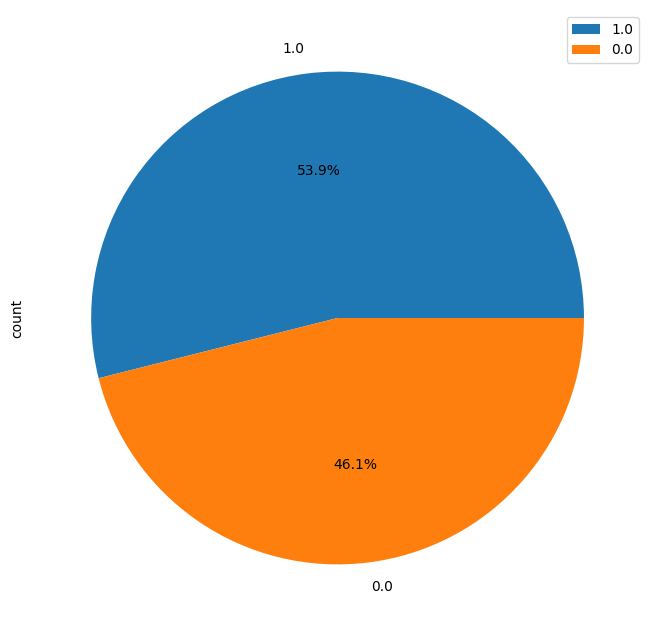

In [15]:
train_data["efs"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# All features of train data distrubution 

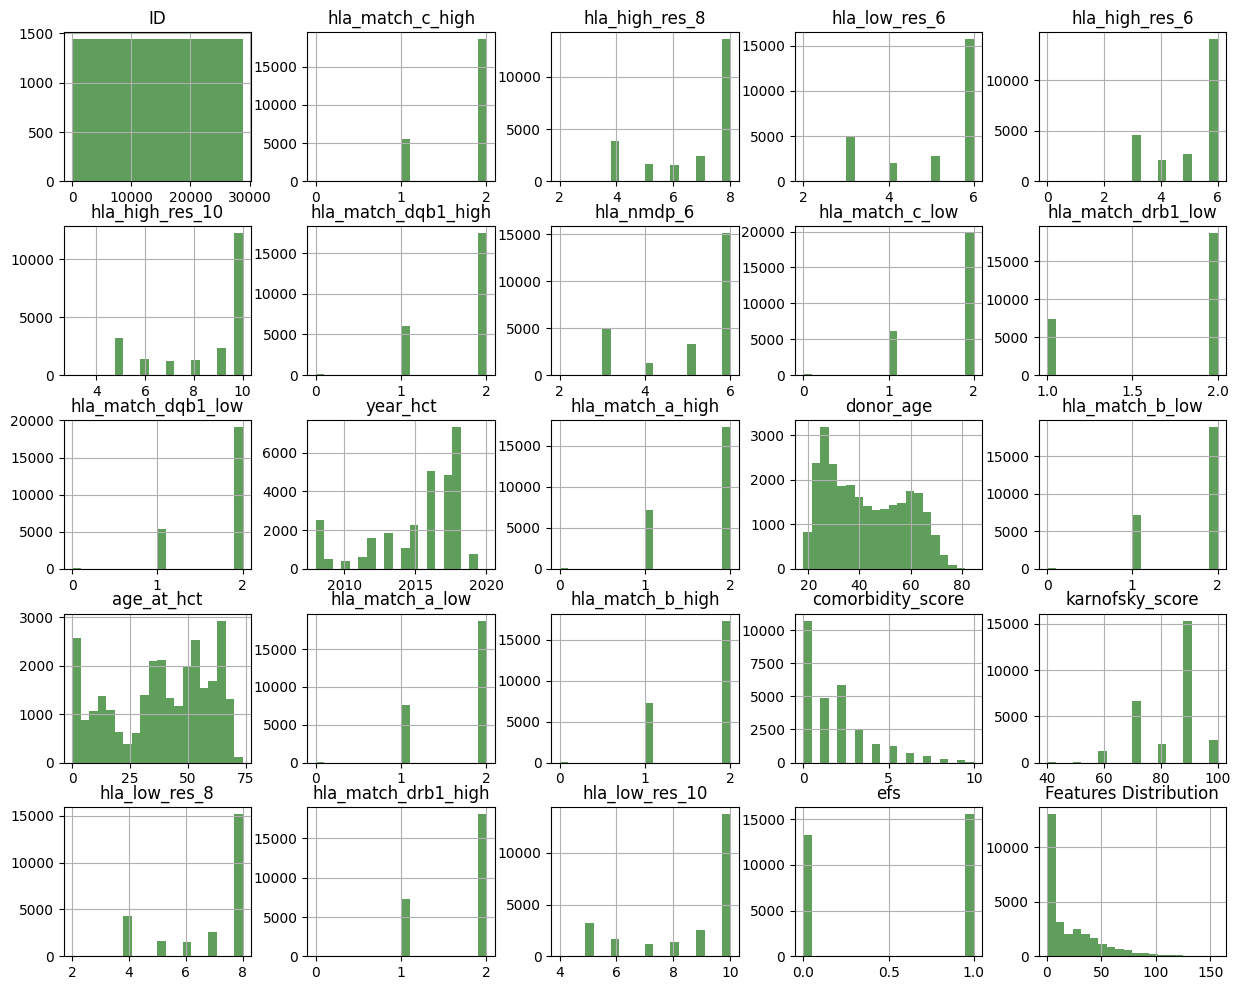

In [16]:
train_data.hist(figsize=(15,12),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

<div class="alert alert-block alert-danger">  
    <h1><strong>Loading testing data</strong></h1>
    <i></i>
</div>

In [17]:
test_data = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/test.csv")

# Exploratory data analysis of test data

# Five top records of data

In [18]:
test_data.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


# Five last records of data

In [19]:
test_data.tail()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


# Coloumns/features in data

In [20]:
test_data.columns

Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_hi

# Length of data

In [21]:
print('lenght of data is', len(test_data))

lenght of data is 3


# Shape of data

In [22]:
test_data.shape

(3, 58)

# Data information

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3 non-null      int64  
 1   dri_score               3 non-null      object 
 2   psych_disturb           3 non-null      object 
 3   cyto_score              1 non-null      object 
 4   diabetes                3 non-null      object 
 5   hla_match_c_high        2 non-null      float64
 6   hla_high_res_8          2 non-null      float64
 7   tbi_status              3 non-null      object 
 8   arrhythmia              3 non-null      object 
 9   hla_low_res_6           3 non-null      float64
 10  graft_type              3 non-null      object 
 11  vent_hist               3 non-null      object 
 12  renal_issue             3 non-null      object 
 13  pulm_severe             3 non-null      object 
 14  prim_disease_hct        3 non-null      object

# Data types of all coloumns

In [24]:
test_data.dtypes

ID                          int64
dri_score                  object
psych_disturb              object
cyto_score                 object
diabetes                   object
hla_match_c_high          float64
hla_high_res_8            float64
tbi_status                 object
arrhythmia                 object
hla_low_res_6             float64
graft_type                 object
vent_hist                  object
renal_issue                object
pulm_severe                object
prim_disease_hct           object
hla_high_res_6            float64
cmv_status                 object
hla_high_res_10           float64
hla_match_dqb1_high       float64
tce_imm_match              object
hla_nmdp_6                float64
hla_match_c_low           float64
rituximab                  object
hla_match_drb1_low        float64
hla_match_dqb1_low        float64
prod_type                  object
cyto_score_detail          object
conditioning_intensity     object
ethnicity                  object
year_hct      

# Checking missing Values

In [25]:
test_data[test_data.isnull().any(axis=1)].head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


# Count of missing values

In [26]:
np.sum(test_data.isnull().any(axis=1))

2

# Is there any missing values?

In [27]:
test_data.isnull().values.any()

True

# Counts of missing values in each column

In [28]:
test_data.isnull().sum()

ID                        0
dri_score                 0
psych_disturb             0
cyto_score                2
diabetes                  0
hla_match_c_high          1
hla_high_res_8            1
tbi_status                0
arrhythmia                0
hla_low_res_6             0
graft_type                0
vent_hist                 0
renal_issue               0
pulm_severe               0
prim_disease_hct          0
hla_high_res_6            0
cmv_status                0
hla_high_res_10           1
hla_match_dqb1_high       0
tce_imm_match             1
hla_nmdp_6                0
hla_match_c_low           0
rituximab                 0
hla_match_drb1_low        0
hla_match_dqb1_low        0
prod_type                 0
cyto_score_detail         2
conditioning_intensity    2
ethnicity                 0
year_hct                  0
obesity                   0
mrd_hct                   2
in_vivo_tcd               0
tce_match                 2
hla_match_a_high          0
hepatic_severe      

# Looking at the test data missing values.

In [29]:
NANColumns=[]
i=-1
for a in test_data.isnull().sum():
    i+=1
    if a!=0:
        print(test_data.columns[i],a)
        NANColumns.append(test_data.columns[i])

cyto_score 2
hla_match_c_high 1
hla_high_res_8 1
hla_high_res_10 1
tce_imm_match 1
cyto_score_detail 2
conditioning_intensity 2
mrd_hct 2
tce_match 2
donor_age 2
tce_div_match 1


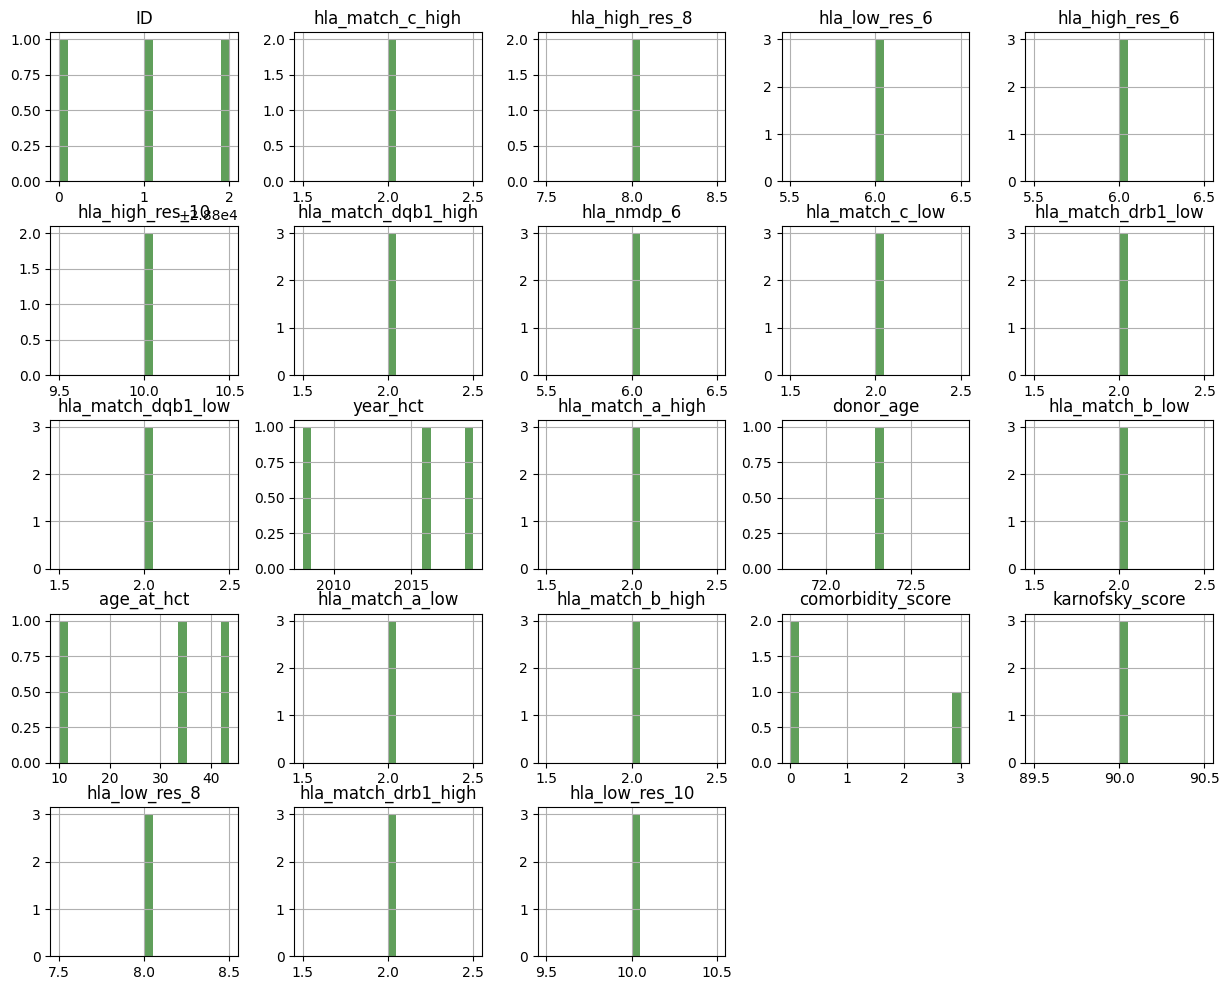

In [30]:
test_data.hist(figsize=(15,12),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

# Identify features and target

In [31]:
X_train = train_data.drop(columns=['efs'])
y_train = train_data['efs']
X_test = test_data.copy()

In [32]:
# Ensuring the consistent columns between train and test
missing_cols_in_test = set(X_train.columns) - set(X_test.columns)
for col in missing_cols_in_test:
    X_test[col] = np.nan
X_test = X_test[X_train.columns] 

# Preprocessing for numerical data`

In [33]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data

In [34]:
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model

In [36]:
model = XGBClassifier()

# Creating and evaluate the pipeline`

In [37]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

# Cross-validation

In [38]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-np.mean(cv_scores)}')

Cross-validated MSE: 0.010659722222222221


# Fit the model

In [39]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['ID', 'hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6',
       'hla_high_res_6', 'hla_high_res_10', 'hla_match_dqb1_high',
       'hla_nmdp_6', 'hla_match_c_low', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'year_hct', 'hla_match_a_high', 'donor_age',
       'hla_match_b_low', 'age_at_h...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

# Predict on test data


In [40]:
predictions = pipeline.predict_proba(X_test)[:, 1]

# Submission of predictions

In [41]:
submission = pd.DataFrame({'ID': test_data['ID'], 'prediction': predictions})

submission.to_csv('submission.csv', index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv


<div class="alert alert-block alert-info">  
<h1><center><strong> Keep in touch with more updates. 😍</strong></center></h1>
       
</div>